In [1]:
from scipy import misc
import glob
from skimage import io
from skimage.transform import resize
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
images = []

for image_path in glob.glob("dane/set0/*.png"):
    image = io.imread(image_path, as_gray=True)
    images.append(image)

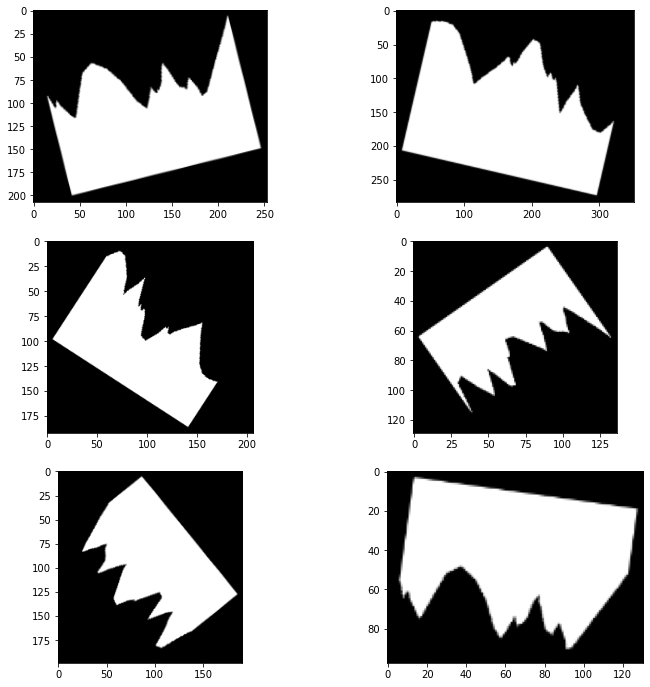

In [3]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

for index, image in enumerate(images):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 


In [4]:
numpyImages = []
for image in images:
    numpyImages.append(np.array(image))

In [5]:
def centerOfMass(image):
    SumX = 0
    SumY = 0
    num  = 0
    
    imageWidth, imageHeight = image.shape
    
    for i in range(imageWidth):
        for j in range(imageHeight):
            SumX += i * image[i,j]
            SumY += j * image[i,j]
            num += image[i,j]


    SumX = SumX / num;
    SumY = SumY / num;
    # The coordinate (SumX,SumY) is the center of the image mass
    return (SumX,SumY)


In [6]:
import imageio as iio
from skimage import filters
from skimage.measure import regionprops

from skimage.measure import find_contours


In [7]:
def centerOfMass2(image):
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    return center_of_mass

In [8]:
def centerOfMass3(image):
    X, Y = image.shape
    m = np.zeros((X, Y))
    for x in range(X):
        for y in range(Y):
            m[x, y] = all(image[x, y] != (0, 0, 0))
    m = m / np.sum(np.sum(m))


    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    cx = np.sum(dx * np.arange(X))
    cy = np.sum(dy * np.arange(Y))
    
    return (cx, cy)

In [9]:
centers = []
for image in numpyImages:
    centers.append(centerOfMass3(image))

In [10]:
centers

[(123.02090545938748, 130.5975588104749),
 (158.69839988100046, 157.56146539450432),
 (102.81453037401123, 88.44697027878047),
 (54.50931899641577, 61.982974910394276),
 (93.30793272808454, 103.22890311058175),
 (41.1828231292517, 66.03287981859413)]

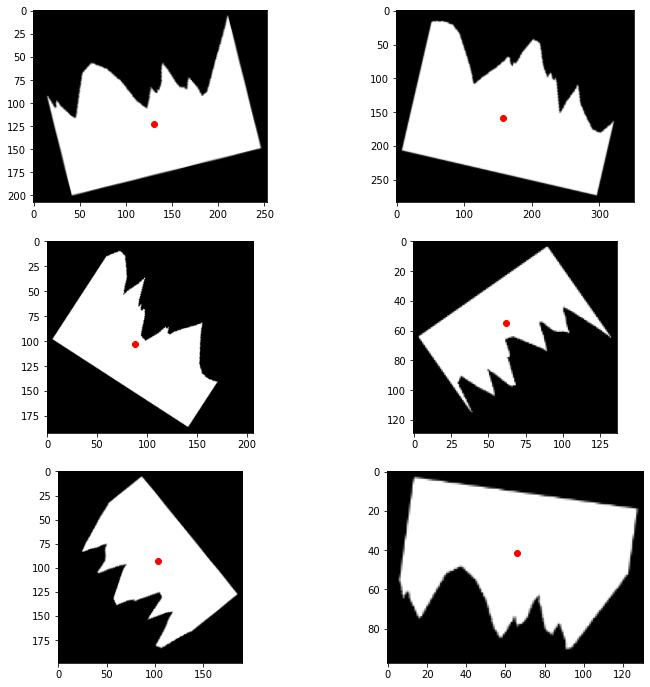

In [11]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center in zip(numpyImages, centers):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    index += 1

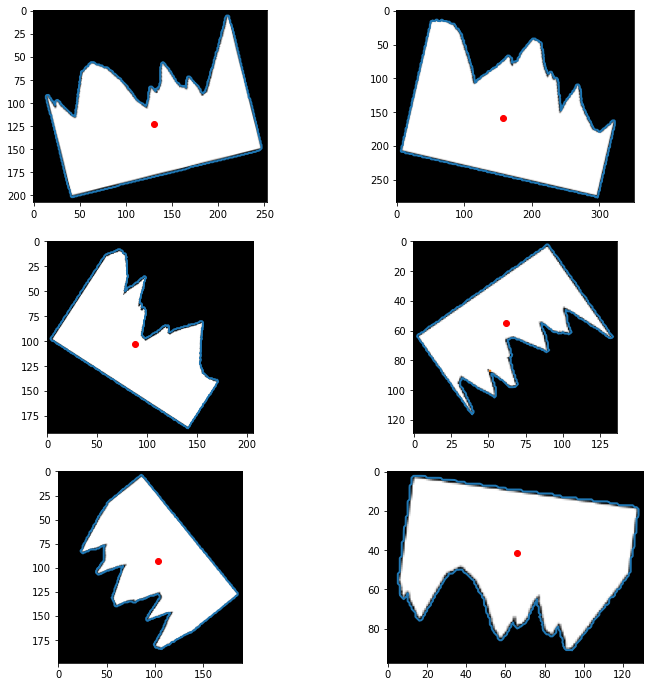

In [12]:


contours = []



for image in numpyImages:    
    contours.append(find_contours(image,0.5))

    
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center, contour in zip(numpyImages, centers, contours):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    for n, cnt in enumerate(contour):
        axs[math.floor(index / 2),index % 2].plot(cnt[:, 1], cnt[:, 0], linewidth=2)
    index += 1  
    


In [187]:
#plan
# zrobić histogram tak jak na wykładzie
# sprawidzić wyniki
# jak nie będą wystarczajaco dobre, to obrócić i znormalizować (wielkosć) obrazki
# Sprawdzić jak działaja momenty HU
# można zrobic regresję liniową na punktach skrajnych (wierzchołki i doliny) i je porównywać


In [189]:
test_contours = np.floor(contours[0])

In [198]:
test_contours = test_contours[0]

In [199]:
test_contours

array([[201.,  43.],
       [201.,  42.],
       [201.,  41.],
       ...,
       [200.,  44.],
       [201.,  43.],
       [201.,  43.]])

In [134]:
pixelContours = []

neighborhood = [(-1,-1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

for image in numpyImages[:1]:
    for row, line in enumerate(image):
        for column, pixel in enumerate(line):
            if(pixel == 0):
                continue
            for x,y in neighborhood:
                try:
                    if image[row + x, column + y] == 0:
                        pixelContours.append((row, column))
                        break
                except:
                    print("err")
                
                
            

array([[201.,  43.],
       [201.,  42.],
       [201.,  41.],
       ...,
       [200.,  44.],
       [201.,  43.],
       [201.,  43.]])

In [208]:
pixelContours

[(6, 209),
 (6, 210),
 (6, 211),
 (7, 209),
 (7, 211),
 (8, 208),
 (8, 209),
 (8, 211),
 (9, 208),
 (9, 211),
 (10, 208),
 (10, 211),
 (10, 212),
 (11, 208),
 (11, 212),
 (12, 207),
 (12, 208),
 (12, 212),
 (13, 207),
 (13, 212),
 (14, 207),
 (14, 212),
 (14, 213),
 (15, 207),
 (15, 213),
 (15, 214),
 (16, 207),
 (16, 214),
 (17, 206),
 (17, 207),
 (17, 214),
 (18, 206),
 (18, 214),
 (19, 206),
 (19, 214),
 (19, 215),
 (20, 206),
 (20, 215),
 (21, 205),
 (21, 206),
 (21, 215),
 (22, 205),
 (22, 215),
 (23, 204),
 (23, 205),
 (23, 215),
 (23, 216),
 (24, 204),
 (24, 216),
 (25, 204),
 (25, 216),
 (26, 204),
 (26, 216),
 (27, 204),
 (27, 216),
 (27, 217),
 (28, 204),
 (28, 217),
 (29, 203),
 (29, 204),
 (29, 217),
 (30, 203),
 (30, 217),
 (31, 202),
 (31, 203),
 (31, 217),
 (31, 218),
 (32, 202),
 (32, 218),
 (33, 202),
 (33, 218),
 (34, 202),
 (34, 218),
 (35, 201),
 (35, 202),
 (35, 218),
 (35, 219),
 (36, 201),
 (36, 219),
 (37, 201),
 (37, 219),
 (38, 201),
 (38, 219),
 (39, 201),
 (

In [220]:
len(test_contours)

1129

In [135]:
len(pixelContours)

1120

In [136]:
contursMap = np.zeros(numpyImages[0].shape)

In [137]:
contursMap.shape

(208, 253)

In [201]:
for r, line in enumerate(contursMap):
    for c, _ in enumerate(line):
        if((r,c) in pixelContours):
            contursMap[r,c] = 1

<Figure size 432x288 with 0 Axes>

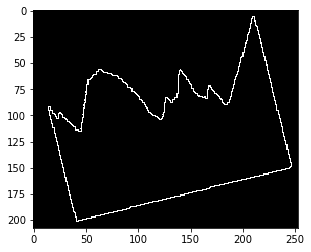

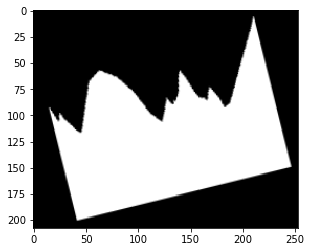

<Figure size 432x288 with 0 Axes>

In [202]:
plt.imshow(contursMap, cmap='gray', interpolation='nearest')
plt.figure()
plt.imshow(numpyImages[0], cmap='gray', interpolation='nearest')
plt.figure()

In [222]:
tc = []

for x,y in test_contours:
    print(x,y)
    tc.append((int(x), int(y)))

201.0 43.0
201.0 42.0
201.0 41.0
201.0 40.0
200.0 40.0
199.0 40.0
198.0 40.0
197.0 40.0
197.0 39.0
196.0 39.0
195.0 39.0
194.0 39.0
193.0 39.0
193.0 38.0
192.0 38.0
192.0 37.0
191.0 37.0
190.0 37.0
189.0 37.0
188.0 37.0
188.0 36.0
187.0 36.0
186.0 36.0
185.0 36.0
184.0 36.0
184.0 35.0
183.0 35.0
182.0 35.0
181.0 35.0
180.0 35.0
180.0 34.0
179.0 34.0
178.0 34.0
177.0 34.0
176.0 34.0
176.0 33.0
175.0 33.0
174.0 33.0
173.0 33.0
172.0 33.0
172.0 32.0
171.0 32.0
170.0 32.0
169.0 32.0
168.0 32.0
167.0 32.0
167.0 31.0
166.0 31.0
165.0 31.0
164.0 31.0
163.0 31.0
163.0 30.0
162.0 30.0
161.0 30.0
160.0 30.0
159.0 30.0
159.0 29.0
158.0 29.0
157.0 29.0
156.0 29.0
155.0 29.0
155.0 28.0
154.0 28.0
153.0 28.0
152.0 28.0
151.0 28.0
150.0 28.0
150.0 27.0
149.0 27.0
148.0 27.0
147.0 27.0
146.0 27.0
146.0 26.0
145.0 26.0
144.0 26.0
143.0 26.0
142.0 26.0
142.0 25.0
141.0 25.0
140.0 25.0
139.0 25.0
138.0 25.0
138.0 24.0
137.0 24.0
136.0 24.0
135.0 24.0
134.0 24.0
134.0 23.0
133.0 23.0
132.0 23.0
131.0 23.0

In [223]:
tc

[(201, 43),
 (201, 42),
 (201, 41),
 (201, 40),
 (200, 40),
 (199, 40),
 (198, 40),
 (197, 40),
 (197, 39),
 (196, 39),
 (195, 39),
 (194, 39),
 (193, 39),
 (193, 38),
 (192, 38),
 (192, 37),
 (191, 37),
 (190, 37),
 (189, 37),
 (188, 37),
 (188, 36),
 (187, 36),
 (186, 36),
 (185, 36),
 (184, 36),
 (184, 35),
 (183, 35),
 (182, 35),
 (181, 35),
 (180, 35),
 (180, 34),
 (179, 34),
 (178, 34),
 (177, 34),
 (176, 34),
 (176, 33),
 (175, 33),
 (174, 33),
 (173, 33),
 (172, 33),
 (172, 32),
 (171, 32),
 (170, 32),
 (169, 32),
 (168, 32),
 (167, 32),
 (167, 31),
 (166, 31),
 (165, 31),
 (164, 31),
 (163, 31),
 (163, 30),
 (162, 30),
 (161, 30),
 (160, 30),
 (159, 30),
 (159, 29),
 (158, 29),
 (157, 29),
 (156, 29),
 (155, 29),
 (155, 28),
 (154, 28),
 (153, 28),
 (152, 28),
 (151, 28),
 (150, 28),
 (150, 27),
 (149, 27),
 (148, 27),
 (147, 27),
 (146, 27),
 (146, 26),
 (145, 26),
 (144, 26),
 (143, 26),
 (142, 26),
 (142, 25),
 (141, 25),
 (140, 25),
 (139, 25),
 (138, 25),
 (138, 24),
 (13

In [227]:
contursMap_test = np.zeros(numpyImages[0].shape)

In [236]:
for r, line in enumerate(contursMap_test):
    for c, _ in enumerate(line):
        if((r,c) in tc):
            contursMap_test[r,c] = 1

In [237]:
contursMap_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<Figure size 432x288 with 0 Axes>

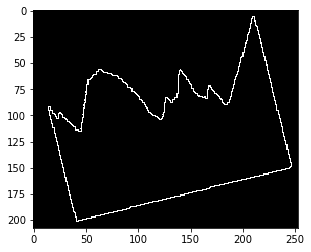

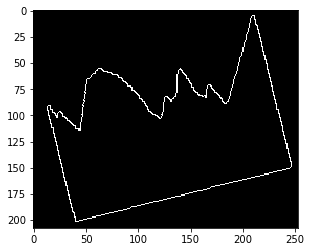

<Figure size 432x288 with 0 Axes>

In [238]:
plt.imshow(contursMap, cmap='gray', interpolation='nearest')
plt.figure()
plt.imshow(contursMap_test, cmap='gray', interpolation='nearest')
plt.figure()

In [175]:
pixelContours_complex = []


for x,y in pixelContours:
    pixelContours_complex.append(x + 1j * y)
    
pixelContours_complex = np.array(pixelContours_complex)

In [176]:
pixelContours_complex

array([  6.+209.j,   6.+210.j,   6.+211.j, ..., 201. +41.j, 201. +42.j,
       201. +43.j])

In [239]:
tc_complex = []


for x,y in tc:
    tc_complex.append(x + 1j * y)
    
tc_complex = np.array(tc_complex)

In [240]:
tc_complex

array([201.+43.j, 201.+42.j, 201.+41.j, ..., 200.+44.j, 201.+43.j,
       201.+43.j])

In [241]:
fourirer = np.fft.ifft(tc_complex)

In [242]:
fourirer

array([107.170062  +130.25597874j,  71.1743631  -37.35512567j,
        12.90533506 -24.53152415j, ...,   0.21825394  -5.84448766j,
         0.89041782  +4.44816713j, -11.88604657 -22.52786048j])

In [243]:
fourirer.real

array([107.170062  ,  71.1743631 ,  12.90533506, ...,   0.21825394,
         0.89041782, -11.88604657])

In [244]:
fourirer.imag

array([130.25597874, -37.35512567, -24.53152415, ...,  -5.84448766,
         4.44816713, -22.52786048])

In [245]:
fourier_plot

array([ 107.5, -101.5,  108. , ...,    0. ,    0. ,    0. ])

<Figure size 432x288 with 0 Axes>

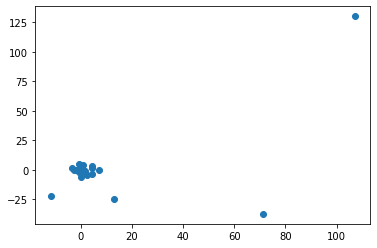

<Figure size 432x288 with 0 Axes>

In [246]:
plt.scatter(fourirer.real,fourirer.imag)
plt.figure()

In [ ]:

freq = np.fft.fftfreq(t.shape[-1])
>>> plt.plot(freq, sp.real, freq, sp.imag)
[<matplotlib.lines.Line2D object at 0x...>, <matplotlib.lines.Line2D object at 0x...>]
>>> plt.show()

In [148]:
np.fft.ifft2(pixelContours)

array([[119.18928571 +0.j        , -11.59196429 +0.j        ],
       [  6.0575017 -10.40092915j,  -1.66518692-15.57516002j],
       [ -6.402789   -6.53228397j,   3.22397388 -8.23404057j],
       ...,
       [  1.95689902 -5.29426541j,  -3.40873069+13.82380099j],
       [ -6.402789   +6.53228397j,   3.22397388 +8.23404057j],
       [  6.0575017 +10.40092915j,  -1.66518692+15.57516002j]])

In [61]:
contursMap = np.zeros(numpyImages[0].shape)


for image in numpyImages[:1]:
    for row, line in enumerate(image):
        for column, pixel in enumerate(line):
            blackPixels = 0
            if(pixel == 0):
                continue
            for x,y in neighborhood:
                try:
                    if image[row + x, column + y] == 0:
                        blackPixels += 1
                        break
                except:
                    pass
            if(blackPixels > 0):
                contursMap[row, column] = 1


Adding (6, 209)
Adding (6, 210)
Adding (6, 211)
Adding (7, 209)
Adding (7, 210)
Adding (7, 211)
Adding (8, 208)
Adding (8, 209)
Adding (8, 210)
Adding (8, 211)
Adding (9, 208)
Adding (9, 209)
Adding (9, 210)
Adding (9, 211)
Adding (10, 208)
Adding (10, 209)
Adding (10, 210)
Adding (10, 211)
Adding (10, 212)
Adding (11, 208)
Adding (11, 209)
Adding (11, 210)
Adding (11, 211)
Adding (11, 212)
Adding (12, 207)
Adding (12, 208)
Adding (12, 209)
Adding (12, 210)
Adding (12, 211)
Adding (12, 212)
Adding (13, 207)
Adding (13, 208)
Adding (13, 209)
Adding (13, 210)
Adding (13, 211)
Adding (13, 212)
Adding (14, 207)
Adding (14, 208)
Adding (14, 209)
Adding (14, 210)
Adding (14, 211)
Adding (14, 212)
Adding (14, 213)
Adding (15, 207)
Adding (15, 208)
Adding (15, 209)
Adding (15, 210)
Adding (15, 211)
Adding (15, 212)
Adding (15, 213)
Adding (15, 214)
Adding (16, 207)
Adding (16, 208)
Adding (16, 209)
Adding (16, 210)
Adding (16, 211)
Adding (16, 212)
Adding (16, 213)
Adding (16, 214)
Adding (17,

Adding (63, 215)
Adding (63, 216)
Adding (63, 217)
Adding (63, 218)
Adding (63, 219)
Adding (63, 220)
Adding (63, 221)
Adding (63, 222)
Adding (63, 223)
Adding (63, 224)
Adding (63, 225)
Adding (64, 55)
Adding (64, 56)
Adding (64, 57)
Adding (64, 58)
Adding (64, 59)
Adding (64, 60)
Adding (64, 61)
Adding (64, 62)
Adding (64, 63)
Adding (64, 64)
Adding (64, 65)
Adding (64, 66)
Adding (64, 67)
Adding (64, 68)
Adding (64, 69)
Adding (64, 70)
Adding (64, 71)
Adding (64, 72)
Adding (64, 73)
Adding (64, 74)
Adding (64, 75)
Adding (64, 76)
Adding (64, 77)
Adding (64, 78)
Adding (64, 79)
Adding (64, 80)
Adding (64, 81)
Adding (64, 138)
Adding (64, 139)
Adding (64, 140)
Adding (64, 141)
Adding (64, 142)
Adding (64, 143)
Adding (64, 144)
Adding (64, 145)
Adding (64, 146)
Adding (64, 193)
Adding (64, 194)
Adding (64, 195)
Adding (64, 196)
Adding (64, 197)
Adding (64, 198)
Adding (64, 199)
Adding (64, 200)
Adding (64, 201)
Adding (64, 202)
Adding (64, 203)
Adding (64, 204)
Adding (64, 205)
Adding 

Adding (76, 57)
Adding (76, 58)
Adding (76, 59)
Adding (76, 60)
Adding (76, 61)
Adding (76, 62)
Adding (76, 63)
Adding (76, 64)
Adding (76, 65)
Adding (76, 66)
Adding (76, 67)
Adding (76, 68)
Adding (76, 69)
Adding (76, 70)
Adding (76, 71)
Adding (76, 72)
Adding (76, 73)
Adding (76, 74)
Adding (76, 75)
Adding (76, 76)
Adding (76, 77)
Adding (76, 78)
Adding (76, 79)
Adding (76, 80)
Adding (76, 81)
Adding (76, 82)
Adding (76, 83)
Adding (76, 84)
Adding (76, 85)
Adding (76, 86)
Adding (76, 87)
Adding (76, 88)
Adding (76, 89)
Adding (76, 90)
Adding (76, 91)
Adding (76, 92)
Adding (76, 93)
Adding (76, 94)
Adding (76, 138)
Adding (76, 139)
Adding (76, 140)
Adding (76, 141)
Adding (76, 142)
Adding (76, 143)
Adding (76, 144)
Adding (76, 145)
Adding (76, 146)
Adding (76, 147)
Adding (76, 148)
Adding (76, 149)
Adding (76, 150)
Adding (76, 151)
Adding (76, 152)
Adding (76, 153)
Adding (76, 166)
Adding (76, 167)
Adding (76, 168)
Adding (76, 169)
Adding (76, 170)
Adding (76, 171)
Adding (76, 172)
A

Adding (85, 213)
Adding (85, 214)
Adding (85, 215)
Adding (85, 216)
Adding (85, 217)
Adding (85, 218)
Adding (85, 219)
Adding (85, 220)
Adding (85, 221)
Adding (85, 222)
Adding (85, 223)
Adding (85, 224)
Adding (85, 225)
Adding (85, 226)
Adding (85, 227)
Adding (85, 228)
Adding (85, 229)
Adding (85, 230)
Adding (86, 49)
Adding (86, 50)
Adding (86, 51)
Adding (86, 52)
Adding (86, 53)
Adding (86, 54)
Adding (86, 55)
Adding (86, 56)
Adding (86, 57)
Adding (86, 58)
Adding (86, 59)
Adding (86, 60)
Adding (86, 61)
Adding (86, 62)
Adding (86, 63)
Adding (86, 64)
Adding (86, 65)
Adding (86, 66)
Adding (86, 67)
Adding (86, 68)
Adding (86, 69)
Adding (86, 70)
Adding (86, 71)
Adding (86, 72)
Adding (86, 73)
Adding (86, 74)
Adding (86, 75)
Adding (86, 76)
Adding (86, 77)
Adding (86, 78)
Adding (86, 79)
Adding (86, 80)
Adding (86, 81)
Adding (86, 82)
Adding (86, 83)
Adding (86, 84)
Adding (86, 85)
Adding (86, 86)
Adding (86, 87)
Adding (86, 88)
Adding (86, 89)
Adding (86, 90)
Adding (86, 91)
Adding

Adding (93, 151)
Adding (93, 152)
Adding (93, 153)
Adding (93, 154)
Adding (93, 155)
Adding (93, 156)
Adding (93, 157)
Adding (93, 158)
Adding (93, 159)
Adding (93, 160)
Adding (93, 161)
Adding (93, 162)
Adding (93, 163)
Adding (93, 164)
Adding (93, 165)
Adding (93, 166)
Adding (93, 167)
Adding (93, 168)
Adding (93, 169)
Adding (93, 170)
Adding (93, 171)
Adding (93, 172)
Adding (93, 173)
Adding (93, 174)
Adding (93, 175)
Adding (93, 176)
Adding (93, 177)
Adding (93, 178)
Adding (93, 179)
Adding (93, 180)
Adding (93, 181)
Adding (93, 182)
Adding (93, 183)
Adding (93, 184)
Adding (93, 185)
Adding (93, 186)
Adding (93, 187)
Adding (93, 188)
Adding (93, 189)
Adding (93, 190)
Adding (93, 191)
Adding (93, 192)
Adding (93, 193)
Adding (93, 194)
Adding (93, 195)
Adding (93, 196)
Adding (93, 197)
Adding (93, 198)
Adding (93, 199)
Adding (93, 200)
Adding (93, 201)
Adding (93, 202)
Adding (93, 203)
Adding (93, 204)
Adding (93, 205)
Adding (93, 206)
Adding (93, 207)
Adding (93, 208)
Adding (93, 20

Adding (100, 113)
Adding (100, 114)
Adding (100, 115)
Adding (100, 116)
Adding (100, 124)
Adding (100, 125)
Adding (100, 126)
Adding (100, 127)
Adding (100, 128)
Adding (100, 129)
Adding (100, 130)
Adding (100, 131)
Adding (100, 132)
Adding (100, 133)
Adding (100, 134)
Adding (100, 135)
Adding (100, 136)
Adding (100, 137)
Adding (100, 138)
Adding (100, 139)
Adding (100, 140)
Adding (100, 141)
Adding (100, 142)
Adding (100, 143)
Adding (100, 144)
Adding (100, 145)
Adding (100, 146)
Adding (100, 147)
Adding (100, 148)
Adding (100, 149)
Adding (100, 150)
Adding (100, 151)
Adding (100, 152)
Adding (100, 153)
Adding (100, 154)
Adding (100, 155)
Adding (100, 156)
Adding (100, 157)
Adding (100, 158)
Adding (100, 159)
Adding (100, 160)
Adding (100, 161)
Adding (100, 162)
Adding (100, 163)
Adding (100, 164)
Adding (100, 165)
Adding (100, 166)
Adding (100, 167)
Adding (100, 168)
Adding (100, 169)
Adding (100, 170)
Adding (100, 171)
Adding (100, 172)
Adding (100, 173)
Adding (100, 174)
Adding (10

Adding (106, 149)
Adding (106, 150)
Adding (106, 151)
Adding (106, 152)
Adding (106, 153)
Adding (106, 154)
Adding (106, 155)
Adding (106, 156)
Adding (106, 157)
Adding (106, 158)
Adding (106, 159)
Adding (106, 160)
Adding (106, 161)
Adding (106, 162)
Adding (106, 163)
Adding (106, 164)
Adding (106, 165)
Adding (106, 166)
Adding (106, 167)
Adding (106, 168)
Adding (106, 169)
Adding (106, 170)
Adding (106, 171)
Adding (106, 172)
Adding (106, 173)
Adding (106, 174)
Adding (106, 175)
Adding (106, 176)
Adding (106, 177)
Adding (106, 178)
Adding (106, 179)
Adding (106, 180)
Adding (106, 181)
Adding (106, 182)
Adding (106, 183)
Adding (106, 184)
Adding (106, 185)
Adding (106, 186)
Adding (106, 187)
Adding (106, 188)
Adding (106, 189)
Adding (106, 190)
Adding (106, 191)
Adding (106, 192)
Adding (106, 193)
Adding (106, 194)
Adding (106, 195)
Adding (106, 196)
Adding (106, 197)
Adding (106, 198)
Adding (106, 199)
Adding (106, 200)
Adding (106, 201)
Adding (106, 202)
Adding (106, 203)
Adding (10

Adding (112, 168)
Adding (112, 169)
Adding (112, 170)
Adding (112, 171)
Adding (112, 172)
Adding (112, 173)
Adding (112, 174)
Adding (112, 175)
Adding (112, 176)
Adding (112, 177)
Adding (112, 178)
Adding (112, 179)
Adding (112, 180)
Adding (112, 181)
Adding (112, 182)
Adding (112, 183)
Adding (112, 184)
Adding (112, 185)
Adding (112, 186)
Adding (112, 187)
Adding (112, 188)
Adding (112, 189)
Adding (112, 190)
Adding (112, 191)
Adding (112, 192)
Adding (112, 193)
Adding (112, 194)
Adding (112, 195)
Adding (112, 196)
Adding (112, 197)
Adding (112, 198)
Adding (112, 199)
Adding (112, 200)
Adding (112, 201)
Adding (112, 202)
Adding (112, 203)
Adding (112, 204)
Adding (112, 205)
Adding (112, 206)
Adding (112, 207)
Adding (112, 208)
Adding (112, 209)
Adding (112, 210)
Adding (112, 211)
Adding (112, 212)
Adding (112, 213)
Adding (112, 214)
Adding (112, 215)
Adding (112, 216)
Adding (112, 217)
Adding (112, 218)
Adding (112, 219)
Adding (112, 220)
Adding (112, 221)
Adding (112, 222)
Adding (11

Adding (118, 185)
Adding (118, 186)
Adding (118, 187)
Adding (118, 188)
Adding (118, 189)
Adding (118, 190)
Adding (118, 191)
Adding (118, 192)
Adding (118, 193)
Adding (118, 194)
Adding (118, 195)
Adding (118, 196)
Adding (118, 197)
Adding (118, 198)
Adding (118, 199)
Adding (118, 200)
Adding (118, 201)
Adding (118, 202)
Adding (118, 203)
Adding (118, 204)
Adding (118, 205)
Adding (118, 206)
Adding (118, 207)
Adding (118, 208)
Adding (118, 209)
Adding (118, 210)
Adding (118, 211)
Adding (118, 212)
Adding (118, 213)
Adding (118, 214)
Adding (118, 215)
Adding (118, 216)
Adding (118, 217)
Adding (118, 218)
Adding (118, 219)
Adding (118, 220)
Adding (118, 221)
Adding (118, 222)
Adding (118, 223)
Adding (118, 224)
Adding (118, 225)
Adding (118, 226)
Adding (118, 227)
Adding (118, 228)
Adding (118, 229)
Adding (118, 230)
Adding (118, 231)
Adding (118, 232)
Adding (118, 233)
Adding (118, 234)
Adding (118, 235)
Adding (118, 236)
Adding (118, 237)
Adding (118, 238)
Adding (118, 239)
Adding (11

Adding (124, 176)
Adding (124, 177)
Adding (124, 178)
Adding (124, 179)
Adding (124, 180)
Adding (124, 181)
Adding (124, 182)
Adding (124, 183)
Adding (124, 184)
Adding (124, 185)
Adding (124, 186)
Adding (124, 187)
Adding (124, 188)
Adding (124, 189)
Adding (124, 190)
Adding (124, 191)
Adding (124, 192)
Adding (124, 193)
Adding (124, 194)
Adding (124, 195)
Adding (124, 196)
Adding (124, 197)
Adding (124, 198)
Adding (124, 199)
Adding (124, 200)
Adding (124, 201)
Adding (124, 202)
Adding (124, 203)
Adding (124, 204)
Adding (124, 205)
Adding (124, 206)
Adding (124, 207)
Adding (124, 208)
Adding (124, 209)
Adding (124, 210)
Adding (124, 211)
Adding (124, 212)
Adding (124, 213)
Adding (124, 214)
Adding (124, 215)
Adding (124, 216)
Adding (124, 217)
Adding (124, 218)
Adding (124, 219)
Adding (124, 220)
Adding (124, 221)
Adding (124, 222)
Adding (124, 223)
Adding (124, 224)
Adding (124, 225)
Adding (124, 226)
Adding (124, 227)
Adding (124, 228)
Adding (124, 229)
Adding (124, 230)
Adding (12

Adding (130, 180)
Adding (130, 181)
Adding (130, 182)
Adding (130, 183)
Adding (130, 184)
Adding (130, 185)
Adding (130, 186)
Adding (130, 187)
Adding (130, 188)
Adding (130, 189)
Adding (130, 190)
Adding (130, 191)
Adding (130, 192)
Adding (130, 193)
Adding (130, 194)
Adding (130, 195)
Adding (130, 196)
Adding (130, 197)
Adding (130, 198)
Adding (130, 199)
Adding (130, 200)
Adding (130, 201)
Adding (130, 202)
Adding (130, 203)
Adding (130, 204)
Adding (130, 205)
Adding (130, 206)
Adding (130, 207)
Adding (130, 208)
Adding (130, 209)
Adding (130, 210)
Adding (130, 211)
Adding (130, 212)
Adding (130, 213)
Adding (130, 214)
Adding (130, 215)
Adding (130, 216)
Adding (130, 217)
Adding (130, 218)
Adding (130, 219)
Adding (130, 220)
Adding (130, 221)
Adding (130, 222)
Adding (130, 223)
Adding (130, 224)
Adding (130, 225)
Adding (130, 226)
Adding (130, 227)
Adding (130, 228)
Adding (130, 229)
Adding (130, 230)
Adding (130, 231)
Adding (130, 232)
Adding (130, 233)
Adding (130, 234)
Adding (13

Adding (136, 233)
Adding (136, 234)
Adding (136, 235)
Adding (136, 236)
Adding (136, 237)
Adding (136, 238)
Adding (136, 239)
Adding (136, 240)
Adding (136, 241)
Adding (136, 242)
Adding (136, 243)
Adding (137, 25)
Adding (137, 26)
Adding (137, 27)
Adding (137, 28)
Adding (137, 29)
Adding (137, 30)
Adding (137, 31)
Adding (137, 32)
Adding (137, 33)
Adding (137, 34)
Adding (137, 35)
Adding (137, 36)
Adding (137, 37)
Adding (137, 38)
Adding (137, 39)
Adding (137, 40)
Adding (137, 41)
Adding (137, 42)
Adding (137, 43)
Adding (137, 44)
Adding (137, 45)
Adding (137, 46)
Adding (137, 47)
Adding (137, 48)
Adding (137, 49)
Adding (137, 50)
Adding (137, 51)
Adding (137, 52)
Adding (137, 53)
Adding (137, 54)
Adding (137, 55)
Adding (137, 56)
Adding (137, 57)
Adding (137, 58)
Adding (137, 59)
Adding (137, 60)
Adding (137, 61)
Adding (137, 62)
Adding (137, 63)
Adding (137, 64)
Adding (137, 65)
Adding (137, 66)
Adding (137, 67)
Adding (137, 68)
Adding (137, 69)
Adding (137, 70)
Adding (137, 71)
Add

Adding (142, 101)
Adding (142, 102)
Adding (142, 103)
Adding (142, 104)
Adding (142, 105)
Adding (142, 106)
Adding (142, 107)
Adding (142, 108)
Adding (142, 109)
Adding (142, 110)
Adding (142, 111)
Adding (142, 112)
Adding (142, 113)
Adding (142, 114)
Adding (142, 115)
Adding (142, 116)
Adding (142, 117)
Adding (142, 118)
Adding (142, 119)
Adding (142, 120)
Adding (142, 121)
Adding (142, 122)
Adding (142, 123)
Adding (142, 124)
Adding (142, 125)
Adding (142, 126)
Adding (142, 127)
Adding (142, 128)
Adding (142, 129)
Adding (142, 130)
Adding (142, 131)
Adding (142, 132)
Adding (142, 133)
Adding (142, 134)
Adding (142, 135)
Adding (142, 136)
Adding (142, 137)
Adding (142, 138)
Adding (142, 139)
Adding (142, 140)
Adding (142, 141)
Adding (142, 142)
Adding (142, 143)
Adding (142, 144)
Adding (142, 145)
Adding (142, 146)
Adding (142, 147)
Adding (142, 148)
Adding (142, 149)
Adding (142, 150)
Adding (142, 151)
Adding (142, 152)
Adding (142, 153)
Adding (142, 154)
Adding (142, 155)
Adding (14

Adding (148, 109)
Adding (148, 110)
Adding (148, 111)
Adding (148, 112)
Adding (148, 113)
Adding (148, 114)
Adding (148, 115)
Adding (148, 116)
Adding (148, 117)
Adding (148, 118)
Adding (148, 119)
Adding (148, 120)
Adding (148, 121)
Adding (148, 122)
Adding (148, 123)
Adding (148, 124)
Adding (148, 125)
Adding (148, 126)
Adding (148, 127)
Adding (148, 128)
Adding (148, 129)
Adding (148, 130)
Adding (148, 131)
Adding (148, 132)
Adding (148, 133)
Adding (148, 134)
Adding (148, 135)
Adding (148, 136)
Adding (148, 137)
Adding (148, 138)
Adding (148, 139)
Adding (148, 140)
Adding (148, 141)
Adding (148, 142)
Adding (148, 143)
Adding (148, 144)
Adding (148, 145)
Adding (148, 146)
Adding (148, 147)
Adding (148, 148)
Adding (148, 149)
Adding (148, 150)
Adding (148, 151)
Adding (148, 152)
Adding (148, 153)
Adding (148, 154)
Adding (148, 155)
Adding (148, 156)
Adding (148, 157)
Adding (148, 158)
Adding (148, 159)
Adding (148, 160)
Adding (148, 161)
Adding (148, 162)
Adding (148, 163)
Adding (14

Adding (154, 137)
Adding (154, 138)
Adding (154, 139)
Adding (154, 140)
Adding (154, 141)
Adding (154, 142)
Adding (154, 143)
Adding (154, 144)
Adding (154, 145)
Adding (154, 146)
Adding (154, 147)
Adding (154, 148)
Adding (154, 149)
Adding (154, 150)
Adding (154, 151)
Adding (154, 152)
Adding (154, 153)
Adding (154, 154)
Adding (154, 155)
Adding (154, 156)
Adding (154, 157)
Adding (154, 158)
Adding (154, 159)
Adding (154, 160)
Adding (154, 161)
Adding (154, 162)
Adding (154, 163)
Adding (154, 164)
Adding (154, 165)
Adding (154, 166)
Adding (154, 167)
Adding (154, 168)
Adding (154, 169)
Adding (154, 170)
Adding (154, 171)
Adding (154, 172)
Adding (154, 173)
Adding (154, 174)
Adding (154, 175)
Adding (154, 176)
Adding (154, 177)
Adding (154, 178)
Adding (154, 179)
Adding (154, 180)
Adding (154, 181)
Adding (154, 182)
Adding (154, 183)
Adding (154, 184)
Adding (154, 185)
Adding (154, 186)
Adding (154, 187)
Adding (154, 188)
Adding (154, 189)
Adding (154, 190)
Adding (154, 191)
Adding (15

Adding (161, 106)
Adding (161, 107)
Adding (161, 108)
Adding (161, 109)
Adding (161, 110)
Adding (161, 111)
Adding (161, 112)
Adding (161, 113)
Adding (161, 114)
Adding (161, 115)
Adding (161, 116)
Adding (161, 117)
Adding (161, 118)
Adding (161, 119)
Adding (161, 120)
Adding (161, 121)
Adding (161, 122)
Adding (161, 123)
Adding (161, 124)
Adding (161, 125)
Adding (161, 126)
Adding (161, 127)
Adding (161, 128)
Adding (161, 129)
Adding (161, 130)
Adding (161, 131)
Adding (161, 132)
Adding (161, 133)
Adding (161, 134)
Adding (161, 135)
Adding (161, 136)
Adding (161, 137)
Adding (161, 138)
Adding (161, 139)
Adding (161, 140)
Adding (161, 141)
Adding (161, 142)
Adding (161, 143)
Adding (161, 144)
Adding (161, 145)
Adding (161, 146)
Adding (161, 147)
Adding (161, 148)
Adding (161, 149)
Adding (161, 150)
Adding (161, 151)
Adding (161, 152)
Adding (161, 153)
Adding (161, 154)
Adding (161, 155)
Adding (161, 156)
Adding (161, 157)
Adding (161, 158)
Adding (161, 159)
Adding (161, 160)
Adding (16

Adding (169, 156)
Adding (169, 157)
Adding (169, 158)
Adding (169, 159)
Adding (169, 160)
Adding (169, 161)
Adding (169, 162)
Adding (169, 163)
Adding (169, 164)
Adding (169, 165)
Adding (169, 166)
Adding (169, 167)
Adding (169, 168)
Adding (169, 169)
Adding (170, 33)
Adding (170, 34)
Adding (170, 35)
Adding (170, 36)
Adding (170, 37)
Adding (170, 38)
Adding (170, 39)
Adding (170, 40)
Adding (170, 41)
Adding (170, 42)
Adding (170, 43)
Adding (170, 44)
Adding (170, 45)
Adding (170, 46)
Adding (170, 47)
Adding (170, 48)
Adding (170, 49)
Adding (170, 50)
Adding (170, 51)
Adding (170, 52)
Adding (170, 53)
Adding (170, 54)
Adding (170, 55)
Adding (170, 56)
Adding (170, 57)
Adding (170, 58)
Adding (170, 59)
Adding (170, 60)
Adding (170, 61)
Adding (170, 62)
Adding (170, 63)
Adding (170, 64)
Adding (170, 65)
Adding (170, 66)
Adding (170, 67)
Adding (170, 68)
Adding (170, 69)
Adding (170, 70)
Adding (170, 71)
Adding (170, 72)
Adding (170, 73)
Adding (170, 74)
Adding (170, 75)
Adding (170, 76)


Adding (180, 42)
Adding (180, 43)
Adding (180, 44)
Adding (180, 45)
Adding (180, 46)
Adding (180, 47)
Adding (180, 48)
Adding (180, 49)
Adding (180, 50)
Adding (180, 51)
Adding (180, 52)
Adding (180, 53)
Adding (180, 54)
Adding (180, 55)
Adding (180, 56)
Adding (180, 57)
Adding (180, 58)
Adding (180, 59)
Adding (180, 60)
Adding (180, 61)
Adding (180, 62)
Adding (180, 63)
Adding (180, 64)
Adding (180, 65)
Adding (180, 66)
Adding (180, 67)
Adding (180, 68)
Adding (180, 69)
Adding (180, 70)
Adding (180, 71)
Adding (180, 72)
Adding (180, 73)
Adding (180, 74)
Adding (180, 75)
Adding (180, 76)
Adding (180, 77)
Adding (180, 78)
Adding (180, 79)
Adding (180, 80)
Adding (180, 81)
Adding (180, 82)
Adding (180, 83)
Adding (180, 84)
Adding (180, 85)
Adding (180, 86)
Adding (180, 87)
Adding (180, 88)
Adding (180, 89)
Adding (180, 90)
Adding (180, 91)
Adding (180, 92)
Adding (180, 93)
Adding (180, 94)
Adding (180, 95)
Adding (180, 96)
Adding (180, 97)
Adding (180, 98)
Adding (180, 99)
Adding (180, 1

<Figure size 432x288 with 0 Axes>

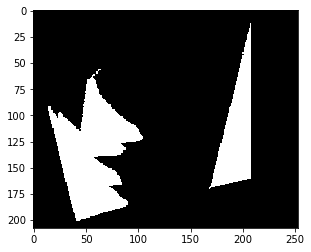

<Figure size 432x288 with 0 Axes>